In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from examineFlare import examineFlare

In [2]:
kic2tic = pd.read_csv('KIC2TIC.csv')
flares = pd.read_csv('14to26_flare_out.csv')
flares['file'] = flares['file'].str.replace(r'./', '')
param = pd.read_csv('14to26_param_out.csv')
len(kic2tic)

198318

In [3]:
inkep = flares[np.isin(flares['TIC'], kic2tic['TIC'])]
len(inkep), len(np.unique(inkep['TIC']))

(70, 28)

In [4]:
unique_tics = np.unique(inkep['TIC'])
nflares = np.zeros_like(unique_tics)

for idx, tic in enumerate(unique_tics):
    nflares[idx] = len(inkep[inkep['TIC'] == tic])

In [5]:
kep_flare_tics = unique_tics[nflares >= 10]
kep_flare_tics

array([164644375, 267748551])

tess2019198215352-s0014-0000000164644375-0150-s_lc.fits


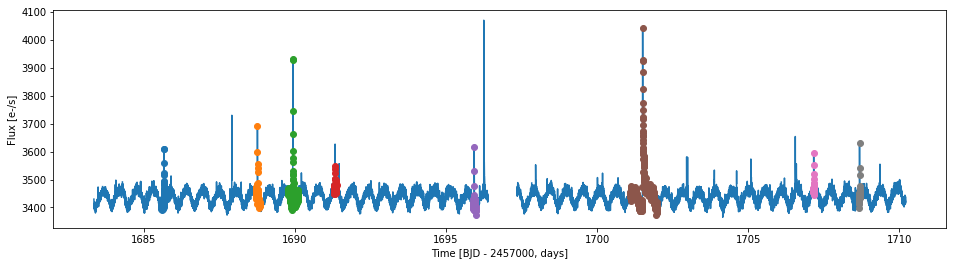

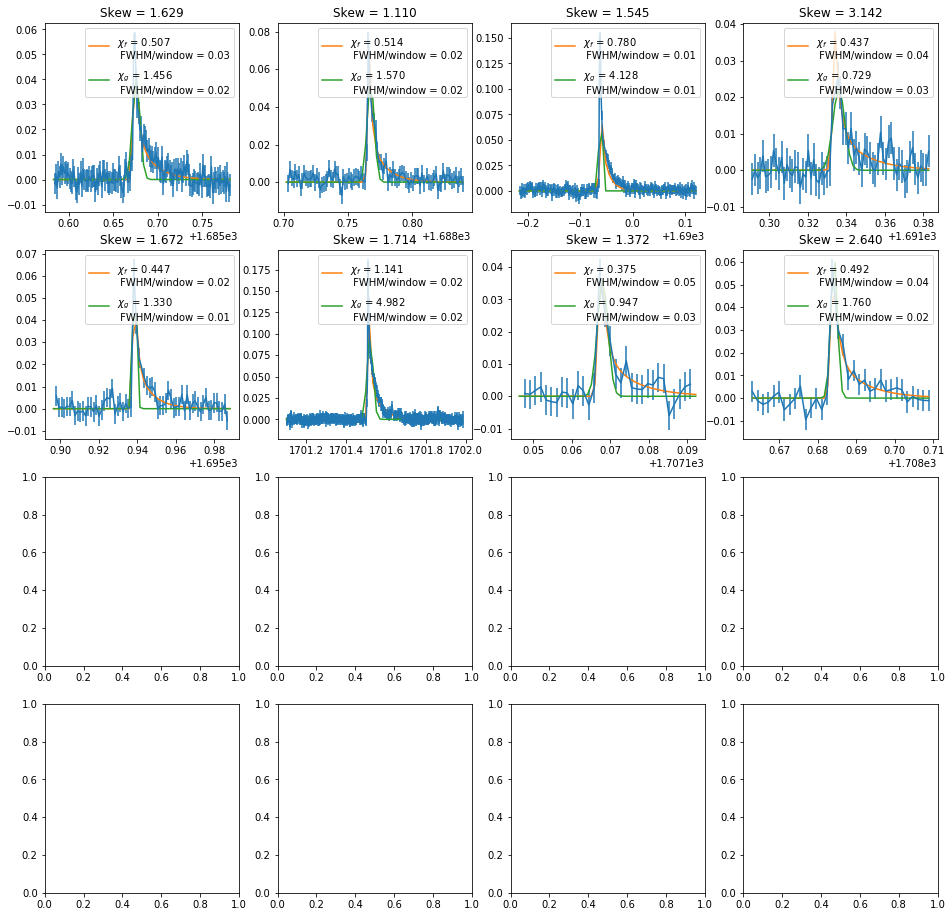

In [9]:
path = '/astro/store/gradscratch/tmp/scw7/tessData/lightcurves/sec14to26/'
filename = param[param['TIC'] == kep_flare_tics[0]]['file'].values[0]
print(filename)

examineFlare(filename, flares, param, path)

11 flares


Text(0.5, 1.0, 'TIC = 164644375, KIC = 7341653, alpha = -0.774 +/- 0.035')

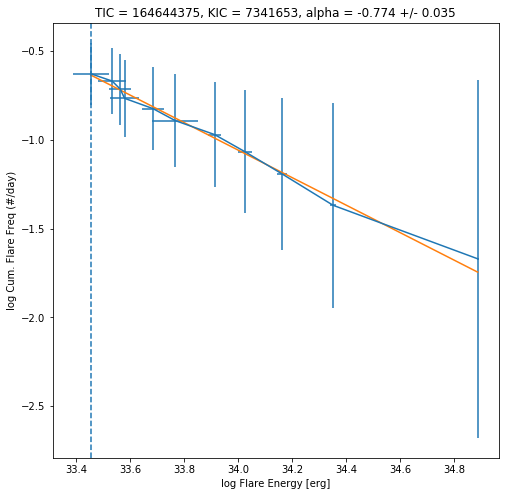

In [7]:
from FFD import FFD, FFD_powerlaw, FlareKernel
import astropy.units as u

target_tic = kep_flare_tics[0]
target_kic = kic2tic[kic2tic['TIC'] == target_tic]['KIC'].values[0]

fl = flares[flares['TIC'] == target_tic]
print(str(len(fl)) + ' flares')

tess_time = 23.4*len(param[param['TIC'] == target_tic])
ed_vals = (fl['ed'].values*u.d).to(1*u.s).value
ed_err_vals = (fl['ed_err'].values*u.d).to(1*u.s).value
x, y, xe, ye = FFD(ed_vals, edErr=ed_err_vals, Lum=fl['lum'].values, TOTEXP=tess_time)

fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(x, y, xerr=xe, yerr=ye)

b0, b1, b0_err, b1_err, cutoff = FFD_powerlaw(x, y, xe, ye, findXmin=True)

xmodel = np.linspace(np.min(x), np.max(x))
ymodel = b0*xmodel + b1

ax.plot(xmodel, ymodel)
ax.axvline(cutoff, linestyle='--')
ax.set_xlabel('log Flare Energy [erg]')
ax.set_ylabel('log Cum. Flare Freq (#/day)')
ax.set_title('TIC = ' + str(target_tic) + ', KIC = ' + str(target_kic) + ', alpha = {:.3f}'.format(b0) + ' +/- {:.3f}'.format(b0_err))

10 flares


Text(0.5, 1.0, 'TIC = 267748551, KIC = 11293949, alpha = -0.636 +/- 0.068')

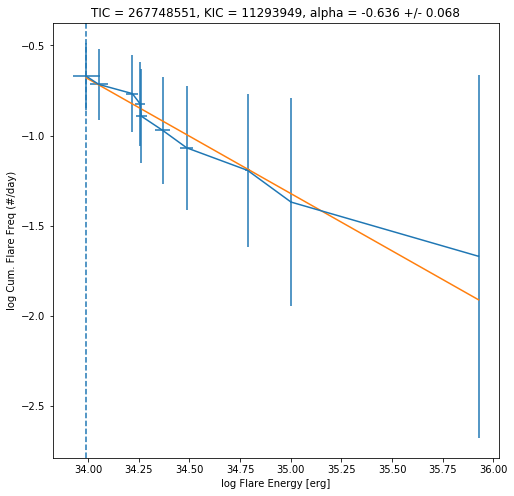

In [8]:
from FFD import FFD, FFD_powerlaw, FlareKernel
import astropy.units as u

target_tic = kep_flare_tics[1]
target_kic = kic2tic[kic2tic['TIC'] == target_tic]['KIC'].values[0]

fl = flares[flares['TIC'] == target_tic]
print(str(len(fl)) + ' flares')

tess_time = 23.4*len(param[param['TIC'] == target_tic])
ed_vals = (fl['ed'].values*u.d).to(1*u.s).value
ed_err_vals = (fl['ed_err'].values*u.d).to(1*u.s).value
x, y, xe, ye = FFD(ed_vals, edErr=ed_err_vals, Lum=fl['lum'].values, TOTEXP=tess_time)

fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(x, y, xerr=xe, yerr=ye)

b0, b1, b0_err, b1_err, cutoff = FFD_powerlaw(x, y, xe, ye, findXmin=True)

xmodel = np.linspace(np.min(x), np.max(x))
ymodel = b0*xmodel + b1

ax.plot(xmodel, ymodel)
ax.axvline(cutoff, linestyle='--')
ax.set_xlabel('log Flare Energy [erg]')
ax.set_ylabel('log Cum. Flare Freq (#/day)')
ax.set_title('TIC = ' + str(target_tic) + ', KIC = ' + str(target_kic) + ', alpha = {:.3f}'.format(b0) + ' +/- {:.3f}'.format(b0_err))